In [2]:
import numpy as np
import matplotlib
import tensorflow as tf
keras = tf.keras
import matplotlib.pyplot as plt

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

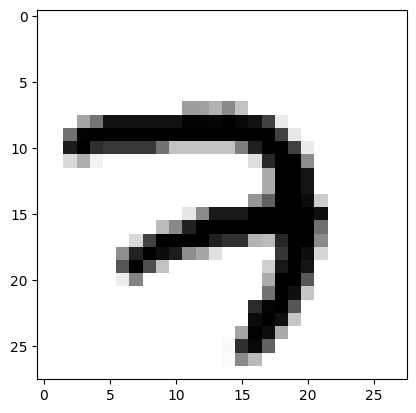

In [8]:
plt.imshow(X_train[0], cmap="binary")


In [9]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train.shape

(55000, 28, 28)

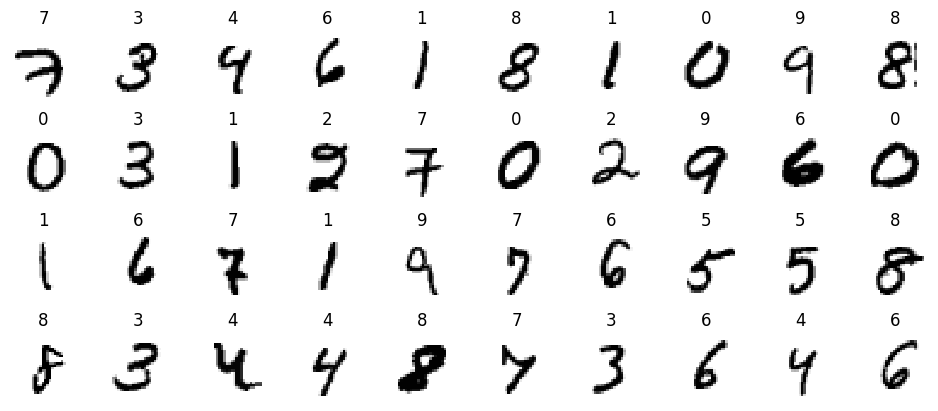

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu", ),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(10, activation=keras.activations.softmax) # im using softmax becasue i want output number
])

In [15]:
model.layers

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 125)               37625     
                                                                 
 dense_2 (Dense)             (None, 10)                1260      
                                                                 
Total params: 274,385
Trainable params: 274,385
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.06491102, -0.07157119,  0.07007997, ..., -0.04882868,
         0.00941166, -0.01578142],
       [ 0.04365671, -0.0510975 ,  0.05944176, ...,  0.04820698,
         0.05183877, -0.04086163],
       [-0.06449393,  0.00039105,  0.06157579, ..., -0.01876922,
         0.03969393, -0.05517721],
       ...,
       [ 0.06850913, -0.02184819, -0.07308154, ..., -0.02366959,
         0.01478996,  0.02880404],
       [-0.04679948,  0.00619688, -0.0209497 , ..., -0.00832191,
        -0.00171407,  0.04022078],
       [-0.04870405,  0.04132507,  0.07160355, ..., -0.01906402,
        -0.00725365, -0.04116347]], dtype=float32)

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.3), metrics=["accuracy"])

In [21]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_04_05-13_07_12'

In [22]:

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
model.fit(X_train, y_train,  validation_data=(X_valid, y_valid), epochs=100, callbacks=[tensorboard_cb, keras.callbacks.EarlyStopping(patience=20)] )

Epoch 1/100


2023-04-05 13:07:12.344760: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 1ms/step - loss: 0.2336 - accuracy: 0.9273 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0936 - accuracy: 0.9714 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0835 - val_accuracy: 0.9748
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0714 - val_accuracy: 0.9788
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0785 - val_accuracy: 0.9788
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0848 - val_accuracy: 0.9800
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0838 - val_accuracy: 0.97

In [23]:
model.history

In [24]:
#tensorboard --logdir=./my_logs --port=6006 run tensorboard

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 579us/step - loss: 0.0891 - accuracy: 0.9851


[0.08911658078432083, 0.9850999712944031]

In [26]:
y_pred = model.predict(X_test, verbose=1)
y_pred

313/313 [==============================] - 0s 499us/step


array([[2.0660573e-17, 6.4048484e-12, 5.6256659e-14, ..., 1.0000000e+00,
        1.7425330e-15, 6.6894355e-12],
       [3.6812034e-19, 5.9029213e-16, 1.0000000e+00, ..., 2.4681066e-20,
        1.9679338e-20, 9.5737237e-29],
       [1.8784600e-13, 1.0000000e+00, 6.5324879e-10, ..., 1.1756920e-09,
        3.2248246e-09, 9.2641044e-14],
       ...,
       [1.3942445e-28, 1.6393441e-24, 5.6866136e-27, ..., 3.2898656e-20,
        1.3844658e-21, 7.8944844e-18],
       [5.9029795e-19, 1.3942467e-25, 3.2840504e-26, ..., 2.6217367e-22,
        2.8276982e-15, 3.1501546e-26],
       [8.9461353e-18, 3.9563774e-21, 3.2327569e-24, ..., 1.2976538e-25,
        6.2127328e-19, 4.2080293e-19]], dtype=float32)

In [27]:
len(model.weights)

6

In [28]:
X_new = X_test[:10]
numbers = [0,1,2,3,4,5,6,7,8,9]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 9ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [29]:
#np.array(numbers)[y_pred]

In [30]:
#for i in range(10):
#    plt.imshow(X_test[i], cmap="binary")
#    plt.axis('off')
#    plt.show()

In [31]:
y_proba = model.predict(X_new) #predict values
y_proba.round(2)

1/1 [==============================] - 0s 10ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

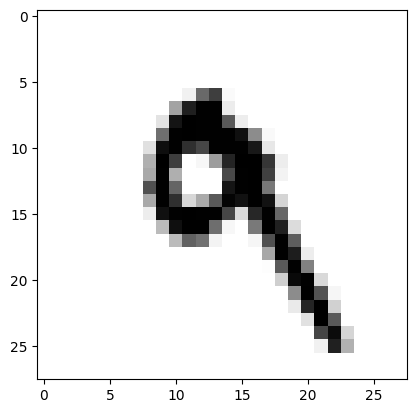

In [62]:

#plt.imshow(X_test[7], cmap="binary")